# Proyecto - PlusTI

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

## Análisis exploratorio de datos

In [2]:
# Cargar el dataset
df = pd.read_csv("dataset_feature_engineering.csv")
df.head()

,cc_num,merchant,category,amt,first,last,gender,street,city,state,...,first_time_at_merchant,dist_between_client_and_merch,trans_month,trans_day,hour,year,times_shopped_at_merchant,times_shopped_at_merchant_year,times_shopped_at_merchant_month,times_shopped_at_merchant_day
0,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,NC,...,True,78.773821,1,1,0,2019,5,4,2,1
1,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,WA,...,True,30.216618,1,1,0,2019,4,4,1,1
2,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,ID,...,True,108.102912,1,1,0,2019,4,3,1,1
3,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,MT,...,True,95.685115,1,1,0,2019,1,1,1,1
4,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,VA,...,True,77.702395,1,1,0,2019,6,1,1,1


In [3]:
# Información general del dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1852394 entries, 0 to 1852393
Data columns (total 35 columns):
 #   Column                           Dtype  
---  ------                           -----  
 0   cc_num                           int64  
 1   merchant                         object 
 2   category                         object 
 3   amt                              float64
 4   first                            object 
 5   last                             object 
 6   gender                           object 
 7   street                           object 
 8   city                             object 
 9   state                            object 
 10  zip                              int64  
 11  lat                              float64
 12  long                             float64
 13  city_pop                         int64  
 14  job                              object 
 15  dob                              object 
 16  trans_num                        object 
 17  unix_tim

In [4]:
# Verificar valores nulos
df.isnull().sum()

cc_num                             0
merchant                           0
category                           0
amt                                0
first                              0
last                               0
gender                             0
street                             0
city                               0
state                              0
zip                                0
lat                                0
long                               0
city_pop                           0
job                                0
dob                                0
trans_num                          0
unix_time                          0
merch_lat                          0
merch_long                         0
is_fraud                           0
amt_month                          0
amt_year                           0
amt_month_shopping_net_spend       0
count_month_shopping_net           0
first_time_at_merchant             0
dist_between_client_and_merch      0
t

In [5]:
# Recuento de clases
print("Recuento de clases:")
print(df['is_fraud'].value_counts())

# Porcentaje de clases
print("\nPorcentaje de clases:")
print(df['is_fraud'].value_counts(normalize=True) * 100)

Recuento de clases:
is_fraud
0    1842743
1       9651
Name: count, dtype: int64

Porcentaje de clases:
is_fraud
0    99.478999
1     0.521001
Name: proportion, dtype: float64


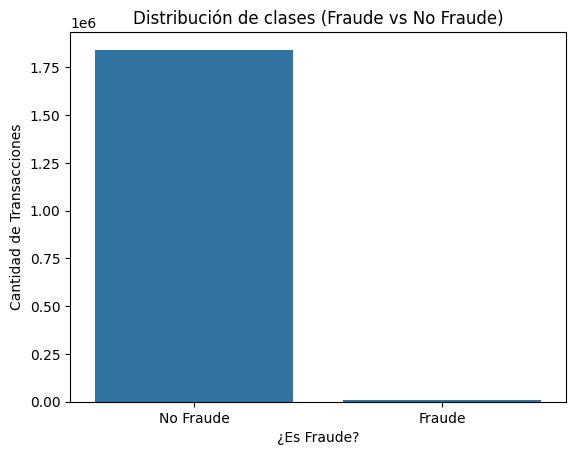

In [6]:
# Visualización
sns.countplot(data=df, x='is_fraud')
plt.title('Distribución de clases (Fraude vs No Fraude)')
plt.xlabel('¿Es Fraude?')
plt.ylabel('Cantidad de Transacciones')
plt.xticks([0, 1], ['No Fraude', 'Fraude'])
plt.show()

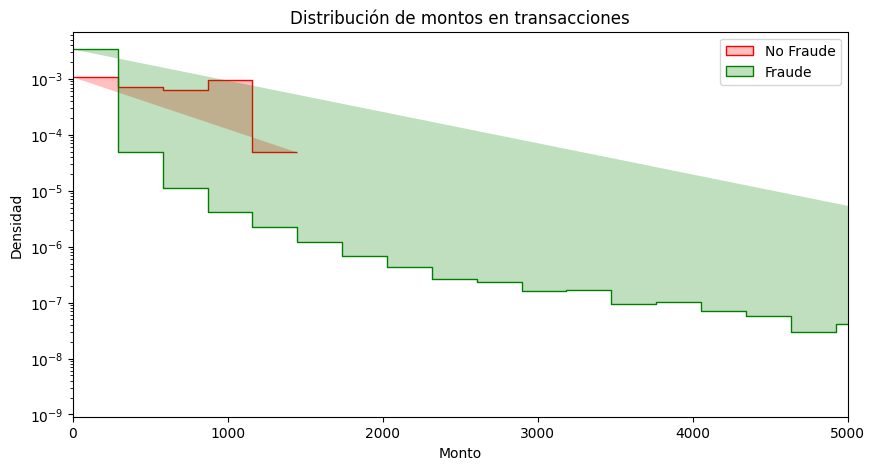

In [7]:
plt.figure(figsize=(10,5))
sns.histplot(data=df, x='amt', bins=100, hue='is_fraud', log_scale=(False, True), palette=['green', 'red'], element='step', stat='density', common_norm=False)
plt.title('Distribución de montos en transacciones')
plt.xlabel('Monto')
plt.ylabel('Densidad')
plt.xlim(0, 5000)
plt.legend(labels=['No Fraude', 'Fraude'])
plt.show()

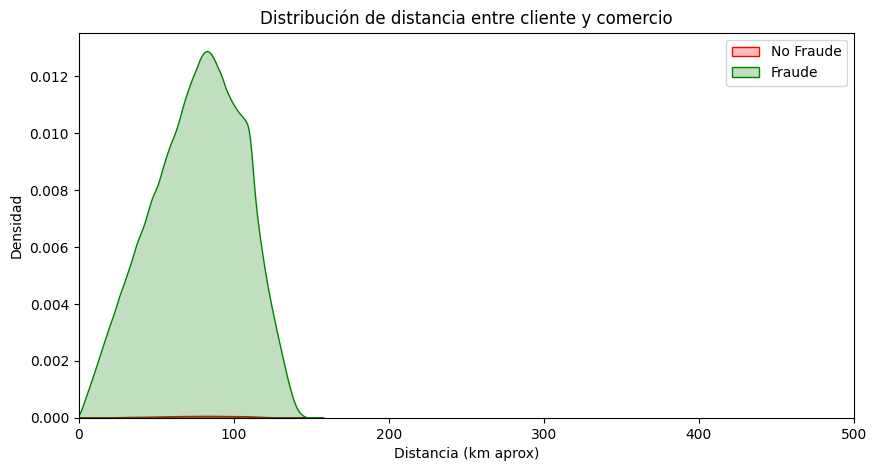

In [8]:
plt.figure(figsize=(10,5))
sns.kdeplot(data=df, x='dist_between_client_and_merch', hue='is_fraud', fill=True, palette=['green', 'red'])
plt.title('Distribución de distancia entre cliente y comercio')
plt.xlabel('Distancia (km aprox)')
plt.ylabel('Densidad')
plt.legend(labels=['No Fraude', 'Fraude'])
plt.xlim(0, 500)
plt.show()

C:\Users\50242\AppData\Local\Temp\ipykernel_7412\1601078828.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=fraude_por_categoria.values, y=fraude_por_categoria.index, palette='Reds_r')


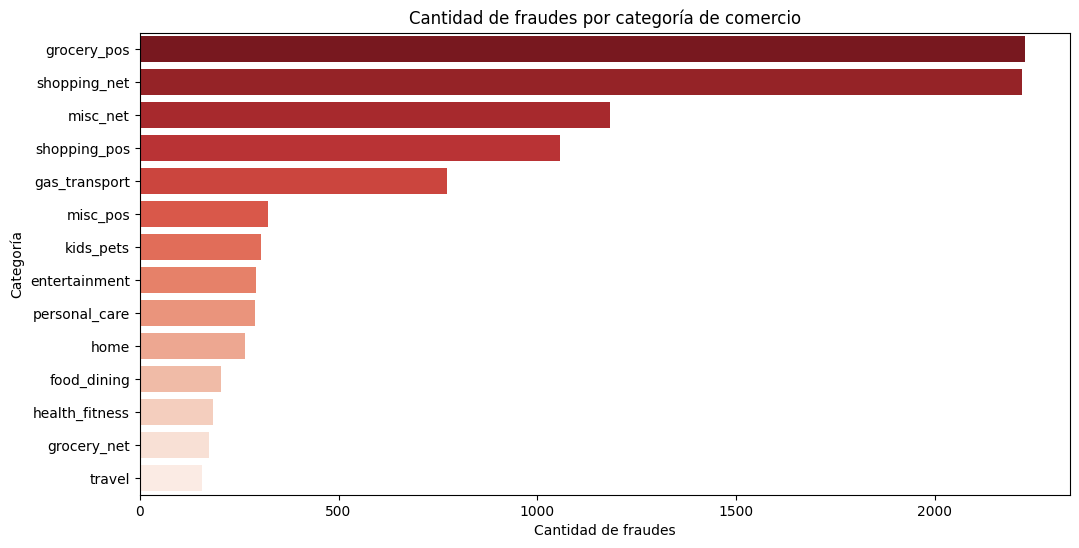

In [9]:
fraude_por_categoria = df[df['is_fraud'] == 1]['category'].value_counts().sort_values(ascending=False)

plt.figure(figsize=(12,6))
sns.barplot(x=fraude_por_categoria.values, y=fraude_por_categoria.index, palette='Reds_r')
plt.title('Cantidad de fraudes por categoría de comercio')
plt.xlabel('Cantidad de fraudes')
plt.ylabel('Categoría')
plt.show()

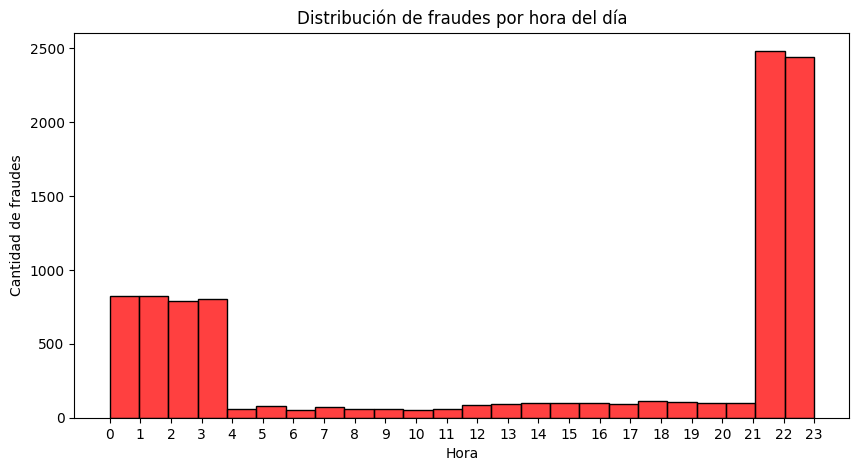

In [10]:
plt.figure(figsize=(10,5))
sns.histplot(data=df[df['is_fraud'] == 1], x='hour', bins=24, color='red', kde=False)
plt.title('Distribución de fraudes por hora del día')
plt.xlabel('Hora')
plt.ylabel('Cantidad de fraudes')
plt.xticks(range(0, 24))
plt.show()

## Ingeniería de variables

In [11]:
# Convertir unix_time a datetime para las fechas
df['transaction_date'] = pd.to_datetime(df['unix_time'], unit='s')

# Identificar la primera transacción registrada para cada comercio
first_transaction_by_merchant = df.groupby('merchant')['transaction_date'].min().reset_index()
first_transaction_by_merchant.rename(columns={'transaction_date': 'first_transaction_date'}, inplace=True)

# Unir esta información al dataframe original
df = df.merge(first_transaction_by_merchant, on='merchant', how='left')

In [12]:
# Calcular días desde la primera transacción del comercio
df['merchant_age_days'] = (df['transaction_date'] - df['first_transaction_date']).dt.days

In [13]:
# Crear una variable booleana que indique si el comercio es nuevo
df['is_new_merchant'] = df['merchant_age_days'] < 30

In [14]:
# Calcular la cantidad de comercios nuevos
new_merchants_count = df['is_new_merchant'].value_counts()
print("\nCantidad de comercios nuevos:")
print(new_merchants_count)


Cantidad de comercios nuevos:
is_new_merchant
False    1800758
True       51636
Name: count, dtype: int64


In [15]:
# Número de fraudes históricos por comercio
fraudes_por_merchant = df.groupby('merchant')['is_fraud'].sum().reset_index()
fraudes_por_merchant.rename(columns={'is_fraud': 'merchant_total_fraudes'}, inplace=True)

# Unir al dataset
df = df.merge(fraudes_por_merchant, on='merchant', how='left')

In [16]:
# Número total de transacciones por comercio
transacciones_por_merchant = df.groupby('merchant').size().reset_index(name='merchant_total_transacciones')

# Unir al dataset
df = df.merge(transacciones_por_merchant, on='merchant', how='left')

# Calcular tasa
df['merchant_fraud_rate'] = df['merchant_total_fraudes'] / df['merchant_total_transacciones']

In [17]:
# Monto de la primera transacción del comercio
primer_monto = df.sort_values('transaction_date').groupby('merchant').first().reset_index()
primer_monto = primer_monto[['merchant', 'amt']]
primer_monto.rename(columns={'amt': 'first_transaction_amt'}, inplace=True)

df = df.merge(primer_monto, on='merchant', how='left')

In [18]:
# Desviación estándar de los montos en los primeros 10 días del comercio
primeros_dias = df[df['merchant_age_days'] <= 10]
variabilidad = primeros_dias.groupby('merchant')['amt'].std().reset_index()
variabilidad.rename(columns={'amt': 'std_amt_first_10_days'}, inplace=True)

df = df.merge(variabilidad, on='merchant', how='left')

In [19]:
# Promedio de distancia en los primeros 10 días del comercio
avg_distancia = primeros_dias.groupby('merchant')['dist_between_client_and_merch'].mean().reset_index()
avg_distancia.rename(columns={'dist_between_client_and_merch': 'avg_distancia_first_10_days'}, inplace=True)

df = df.merge(avg_distancia, on='merchant', how='left')

In [20]:
df.head()

,cc_num,merchant,category,amt,first,last,gender,street,city,state,...,transaction_date,first_transaction_date,merchant_age_days,is_new_merchant,merchant_total_fraudes,merchant_total_transacciones,merchant_fraud_rate,first_transaction_amt,std_amt_first_10_days,avg_distancia_first_10_days
0,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,NC,...,2012-01-01 00:00:18,2012-01-01 00:00:18,0,True,24,1768,0.013575,4.97,238.345394,72.003855
1,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,WA,...,2012-01-01 00:00:44,2012-01-01 00:00:44,0,True,35,3528,0.009921,107.23,57.579585,78.709902
2,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,ID,...,2012-01-01 00:00:51,2012-01-01 00:00:51,0,True,5,2642,0.001893,220.11,90.733688,77.500225
3,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,MT,...,2012-01-01 00:01:16,2012-01-01 00:01:16,0,True,9,3725,0.002416,45.00,13.135232,90.403195
4,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,VA,...,2012-01-01 00:03:06,2012-01-01 00:03:06,0,True,7,2290,0.003057,41.96,101.405982,81.247194


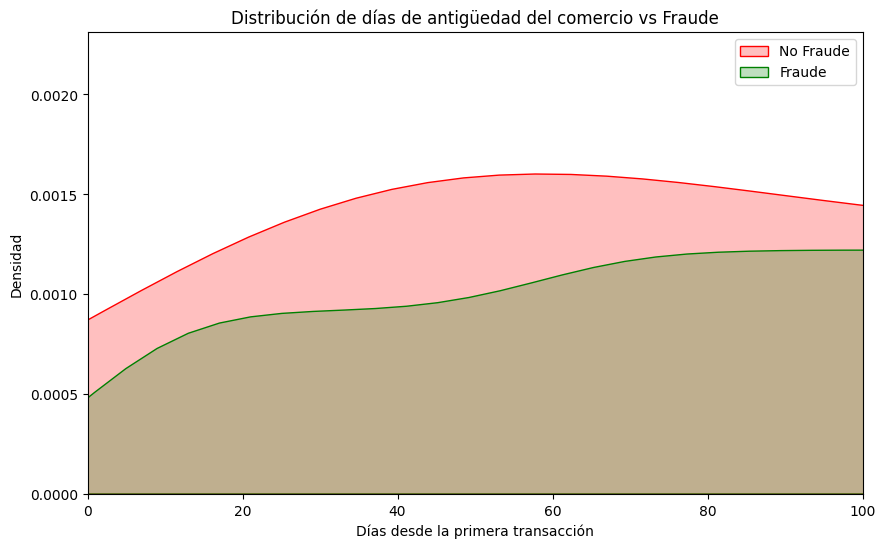

In [21]:
plt.figure(figsize=(10,6))
sns.kdeplot(data=df, x='merchant_age_days', hue='is_fraud', fill=True, common_norm=False, palette=['green', 'red'])
plt.title('Distribución de días de antigüedad del comercio vs Fraude')
plt.xlabel('Días desde la primera transacción')
plt.ylabel('Densidad')
plt.legend(labels=['No Fraude', 'Fraude'])
plt.xlim(0, 100)
plt.show()

C:\Users\50242\AppData\Local\Temp\ipykernel_7412\2916766333.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='is_new_merchant', y='is_fraud', estimator=np.mean, palette=['green', 'red'])


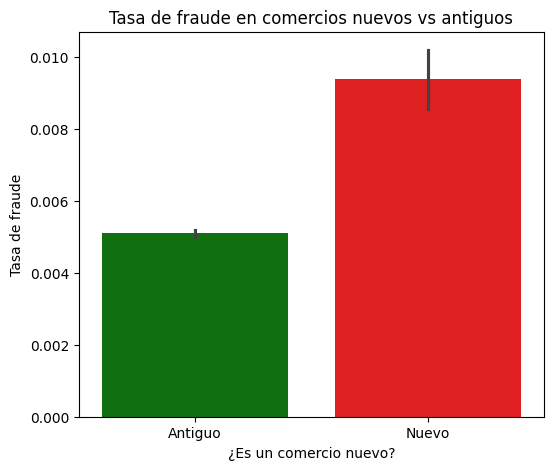

In [22]:
plt.figure(figsize=(6,5))
sns.barplot(data=df, x='is_new_merchant', y='is_fraud', estimator=np.mean, palette=['green', 'red'])
plt.title('Tasa de fraude en comercios nuevos vs antiguos')
plt.xlabel('¿Es un comercio nuevo?')
plt.ylabel('Tasa de fraude')
plt.xticks([0,1], ['Antiguo', 'Nuevo'])
plt.show()

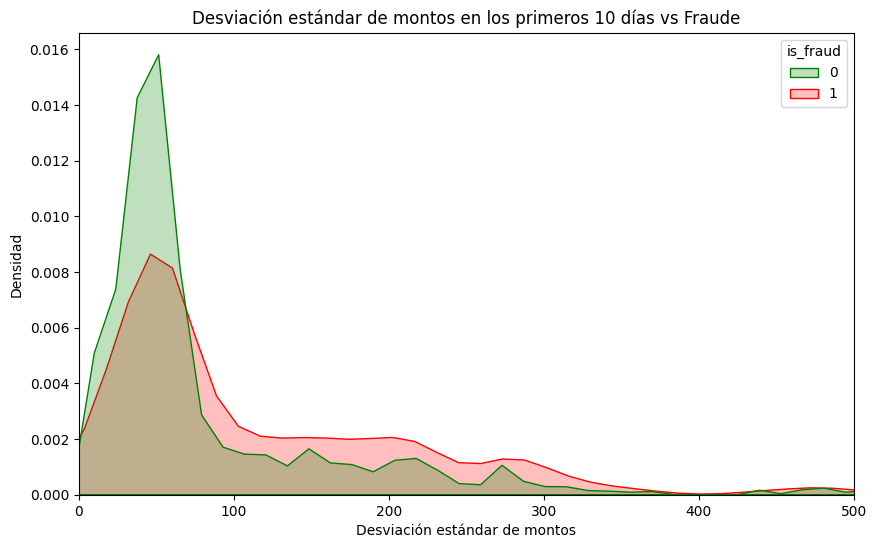

In [23]:
plt.figure(figsize=(10,6))
sns.kdeplot(data=df, x='std_amt_first_10_days', hue='is_fraud', fill=True, common_norm=False, palette=['green', 'red'])
plt.title('Desviación estándar de montos en los primeros 10 días vs Fraude')
plt.xlabel('Desviación estándar de montos')
plt.ylabel('Densidad')
plt.xlim(0, 500)
plt.show()

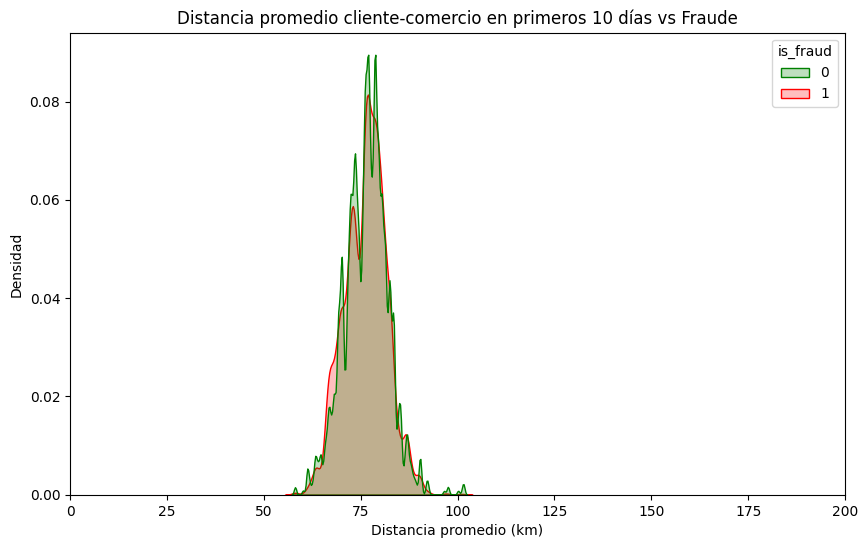

In [24]:
plt.figure(figsize=(10,6))
sns.kdeplot(data=df, x='avg_distancia_first_10_days', hue='is_fraud', fill=True, common_norm=False, palette=['green', 'red'])
plt.title('Distancia promedio cliente-comercio en primeros 10 días vs Fraude')
plt.xlabel('Distancia promedio (km)')
plt.ylabel('Densidad')
plt.xlim(0, 200)
plt.show()

## Implementación del modelo base

In [40]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, f1_score
from sklearn.preprocessing import LabelEncoder
from lightgbm import LGBMClassifier, plot_importance
from lightgbm import early_stopping, log_evaluation

In [41]:
df_modelo = df.copy()

# Convertir 'dob' a edad
df_modelo['dob'] = pd.to_datetime(df_modelo['dob'], errors='coerce')
df_modelo['edad'] = (pd.to_datetime('today') - df_modelo['dob']).dt.days // 365
df_modelo.drop(columns='dob', inplace=True)

# Codificar 'category' y 'job'
le_category = LabelEncoder()
le_job = LabelEncoder()

df_modelo['category'] = le_category.fit_transform(df_modelo['category'].astype(str))
df_modelo['job'] = le_job.fit_transform(df_modelo['job'].astype(str))

In [44]:
# Eliminar columnas no numéricas o irrelevantes
columnas_eliminar = [
    'cc_num', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip', 'trans_num', 'unix_time', 'transaction_date', 
    'first_transaction_date', 'merchant'
]

X = df_modelo.drop(columns=columnas_eliminar + ['is_fraud'])
y = df_modelo['is_fraud']

# Dividir en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.3, random_state=42)

In [45]:
# Inicializar el modelo
modelo_lgbm = LGBMClassifier(
    objective='binary',
    boosting_type='gbdt',
    random_state=42,
    n_estimators=1000
)

In [46]:
# Entrenar el modelo con callbacks
modelo_lgbm.fit(
    X_train, y_train,
    eval_set=[(X_train, y_train), (X_test, y_test)],
    eval_metric='auc',
    callbacks=[
        early_stopping(stopping_rounds=50),
        log_evaluation(period=100)
    ]
)

[LightGBM] [Info] Number of positive: 6756, number of negative: 1289919
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.104953 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4611
[LightGBM] [Info] Number of data points in the train set: 1296675, number of used features: 31
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.005210 -> initscore=-5.251904
[LightGBM] [Info] Start training from score -5.251904
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[7]	training's auc: 0.966852	training's binary_logloss: 0.0135828	valid_1's auc: 0.958688	valid_1's binary_logloss: 0.015666


LGBMClassifier(n_estimators=1000, objective='binary', random_state=42)

In [47]:
# Predicciones
y_pred_proba = modelo_lgbm.predict_proba(X_test)[:, 1]
y_pred = modelo_lgbm.predict(X_test)

In [48]:
# Métricas generales
print("\nReporte de clasificación:")
print(classification_report(y_test, y_pred, digits=4))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print(f"AUC-ROC: {roc_auc_score(y_test, y_pred_proba):.4f}")
print(f"F1 Score: {f1_score(y_test, y_pred):.4f}")


Reporte de clasificación:
              precision    recall  f1-score   support

           0     0.9988    0.9995    0.9991    552824
           1     0.8837    0.7641    0.8196      2895

    accuracy                         0.9982    555719
   macro avg     0.9413    0.8818    0.9093    555719
weighted avg     0.9982    0.9982    0.9982    555719

Confusion Matrix:
[[552533    291]
 [   683   2212]]
AUC-ROC: 0.9587
F1 Score: 0.8196


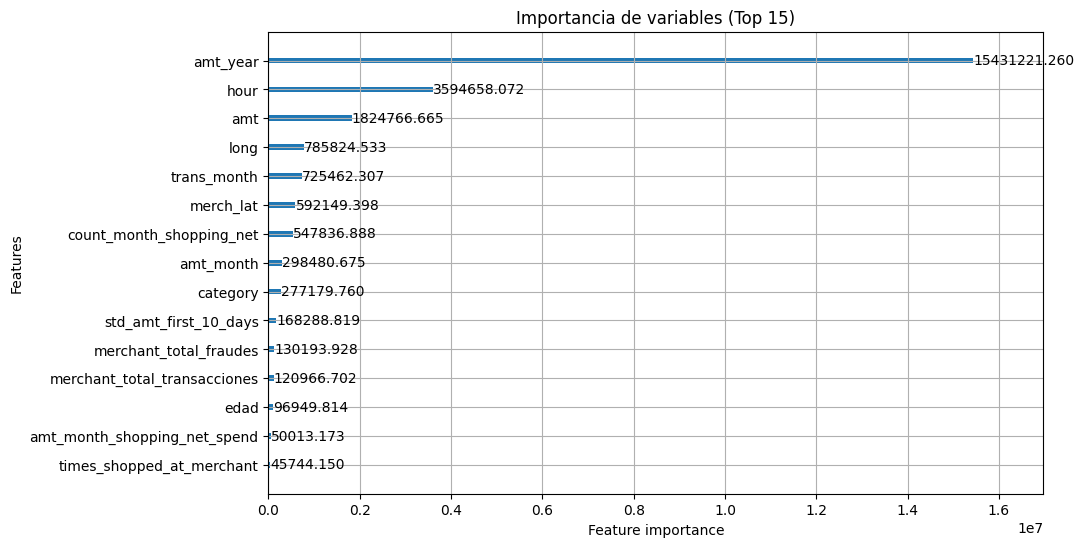

In [49]:
# Importancia de variables
plot_importance(modelo_lgbm, max_num_features=15, importance_type='gain', figsize=(10,6))
plt.title('Importancia de variables (Top 15)')
plt.show()

In [50]:
# Evaluar en comercios nuevos
X_test_new_merchants = X_test[X_test['is_new_merchant'] == True]
y_test_new_merchants = y_test.loc[X_test_new_merchants.index]
y_pred_proba_new = modelo_lgbm.predict_proba(X_test_new_merchants)[:, 1]
y_pred_new = modelo_lgbm.predict(X_test_new_merchants)

In [51]:
print("\nEvaluación en comercios NUEVOS:")
print(classification_report(y_test_new_merchants, y_pred_new, digits=4))
print("F1 Score (new merchants):", f1_score(y_test_new_merchants, y_pred_new))
print("AUC-ROC (new merchants):", roc_auc_score(y_test_new_merchants, y_pred_proba_new))


Evaluación en comercios NUEVOS:
              precision    recall  f1-score   support

           0     0.9975    0.9994    0.9984     15330
           1     0.9318    0.7593    0.8367       162

    accuracy                         0.9969     15492
   macro avg     0.9646    0.8793    0.9176     15492
weighted avg     0.9968    0.9969    0.9967     15492

F1 Score (new merchants): 0.8367346938775511
AUC-ROC (new merchants): 0.9462373060166058
